In [54]:
import pandas as pd #Manipulação de conjuntos de dados
import numpy as np #Manipulações numéricas
import matplotlib.pyplot as plt #Análises gráficas
import seaborn as sns #Análises gráficas

from recursos import treino_trat, teste_trat, codigos #Importação dos Conjuntos

Verificação dos Conjuntos de Dados

In [55]:
dfTreino = treino_trat()
dfTreino.head()

,num_fotos,marca,modelo,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco,tipo_motor
0,8.0,0,0,2017,2017,67772.0,0,4,0,0,...,0,0,0,0,0,0,0,0,74732.590084,1.6
1,8.0,1,1,2017,2017,62979.0,1,4,0,0,...,0,1,0,1,0,1,0,0,81965.332634,2.0
2,16.0,2,2,2018,2019,44070.0,1,4,0,0,...,0,1,0,1,1,1,0,0,162824.814472,2.4
3,14.0,3,3,2013,2015,85357.0,1,4,1,0,...,1,1,0,1,0,0,0,0,123681.358857,2.0
4,8.0,4,4,2013,2015,71491.0,1,4,2,0,...,0,0,0,0,1,1,1,1,82419.763891,2.0


In [56]:
dfTest = teste_trat()
dfTest.head()

,num_fotos,marca,modelo,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,entrega_delivery,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,tipo_motor
0,8.0,0,0,2021,2021,20258.0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1.6
1,18.0,1,1,2021,2021,53045.0,0,2,1,0,...,0,0,0,1,0,0,0,1,0,1.4
2,8.0,2,2,2018,2019,32486.0,1,4,2,0,...,0,0,0,0,0,0,1,1,0,2.0
3,16.0,3,3,2019,2020,24937.0,1,4,3,0,...,0,0,0,1,0,0,0,1,0,1.4
4,8.0,4,4,2019,2019,62074.0,1,4,3,0,...,0,0,0,0,0,0,0,1,0,1.5


Resumo das Variáveis

In [57]:
display(dfTreino.describe(include=[np.number]))

,num_fotos,marca,modelo,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,...,troca,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco,tipo_motor
count,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,...,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,2.958400e+04,29584.000000
mean,10.309931,10.069058,70.043131,2016.758552,2017.808985,58430.592077,1.133011,3.940677,0.897276,0.008383,...,0.171072,0.741009,0.352319,0.689968,0.335485,0.462345,0.147546,0.199770,1.330239e+05,1.929445
std,3.481502,6.886474,73.956687,4.062422,2.673930,32561.769309,0.540913,0.338360,1.162357,0.091175,...,0.376578,0.438088,0.477701,0.462514,0.472168,0.498588,0.354655,0.399834,8.166287e+04,0.900778
min,8.000000,0.000000,0.000000,1985.000000,1997.000000,100.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.869951e+03,0.600000
25%,8.000000,3.000000,19.000000,2015.000000,2016.000000,31214.000000,1.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.657177e+04,1.500000
50%,8.000000,9.000000,49.000000,2018.000000,2018.000000,57434.000000,1.000000,4.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.143558e+05,2.000000
75%,14.000000,14.000000,91.000000,2019.000000,2020.000000,81953.500000,1.000000,4.000000,2.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.636796e+05,2.000000
max,21.000000,39.000000,456.000000,2022.000000,2023.000000,390065.000000,6.000000,4.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.359813e+06,90.000000


Vericação da Distribuição do Target

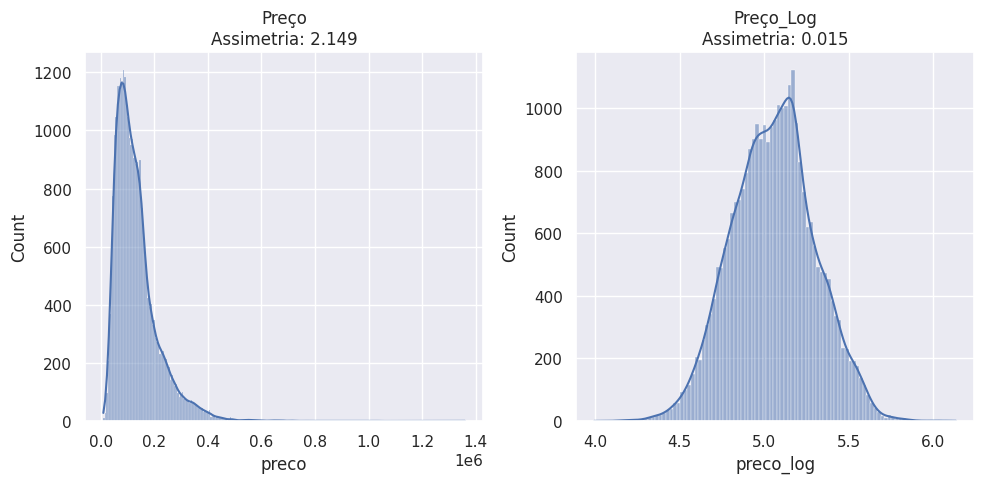

In [58]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
assimetria = dfTreino['preco'].skew().round(3)
texto1 = f"""Preço
Assimetria: {assimetria}"""
ax = sns.histplot(data=dfTreino, x='preco',kde=True)
titulo = ax.set_title(texto1)

plt.subplot(1, 2, 2)
dfTreino["preco_log"] = np.log10(dfTreino['preco'])
assimetria = dfTreino['preco_log'].skew().round(3)
texto2 = f"""Preço_Log
Assimetria: {assimetria}"""
ax = sns.histplot(data=dfTreino, x='preco_log',kde=True)
titulo = ax.set_title(texto2)

plt.tight_layout()
plt.show()

Coeficientes de Correlação de Pearson (Features x Target)

In [59]:
matrizCorr = dfTreino.corr()

correlacaoPreco = pd.DataFrame(matrizCorr["preco"])
correlacaoPrecoLog = pd.DataFrame(matrizCorr["preco_log"])

dfCorr = pd.merge(correlacaoPreco, correlacaoPrecoLog, right_index= True, left_index = True)
dfCorr = dfCorr.drop(["preco","preco_log"])

print(
f"""********************************
      Correlação máxima preco
      Feature: {dfCorr['preco'].idxmax()}
      Coeficiente: {round(dfCorr['preco'].max(), 4)}""")

print(
f"""********************************
      Correlação máxima preco_log
      Feature: {dfCorr['preco_log'].idxmax()}
      Coeficiente: {round(dfCorr['preco_log'].max(),4)}
********************************""")
dfCorr

********************************
      Correlação máxima preco
      Feature: tipo_motor
      Coeficiente: 0.3746
********************************
      Correlação máxima preco_log
      Feature: tipo_motor
      Coeficiente: 0.3398
********************************


,preco,preco_log
num_fotos,-0.031510,-0.041816
marca,0.108308,0.077099
modelo,0.084515,0.003884
ano_de_fabricacao,0.239172,0.333084
ano_modelo,0.214854,0.292651
hodometro,-0.359218,-0.406804
cambio,-0.176117,-0.259894
num_portas,-0.075265,-0.046848
tipo,0.065265,-0.006109
blindado,0.087746,0.069895


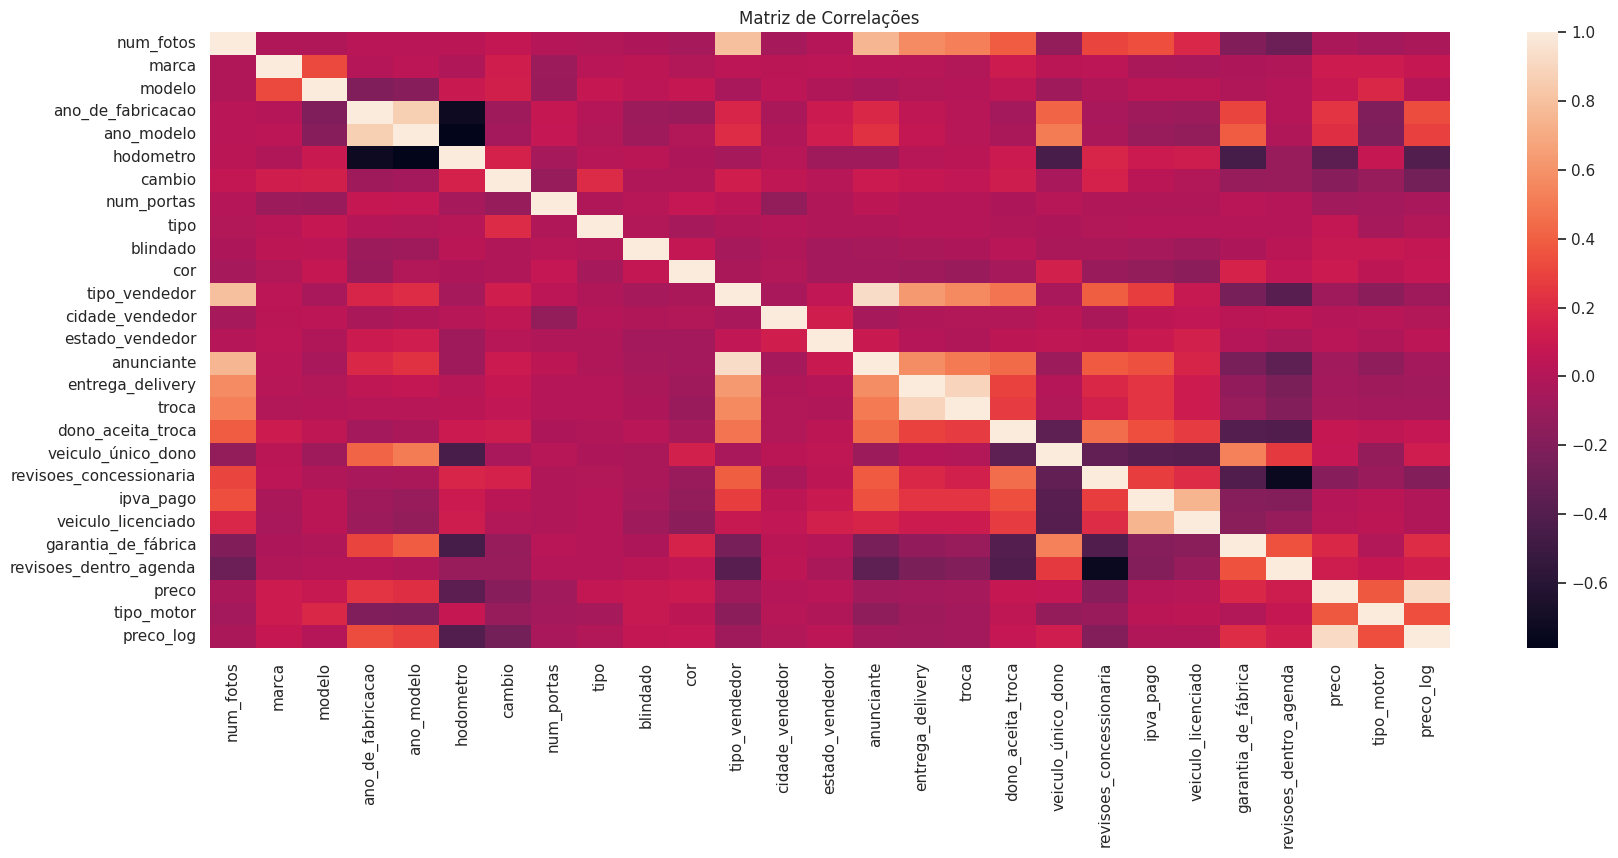

In [60]:
plt.figure(figsize= (20,8))
ax = sns.heatmap(matrizCorr)
plt.title("Matriz de Correlações")
plt.show()

Separação dos Tipos das Features

In [61]:
#Dicionário de variáveis numéricas
COLUNAS_NUM_CONT = {"continuas": ["ano_de_fabricacao", "ano_modelo","hodometro"],
                    "discretas": ["num_fotos", "num_portas"]}

#Lista de variáveis categóricas
COLUNAS_CAT = ["marca",
               "modelo",
               "cambio",
               "tipo",
               "blindado",
               "cor",
               "tipo_vendedor",
               "cidade_vendedor",
               "estado_vendedor",
               "anunciante",
               "entrega_delivery",
               "troca",
               "dono_aceita_troca",
               "veiculo_único_dono",
               "revisoes_concessionaria",
               "ipva_pago",
               "veiculo_licenciado",
               "garantia_de_fábrica",
               "revisoes_dentro_agenda"]

Exploração das Relações Entre Features e Target

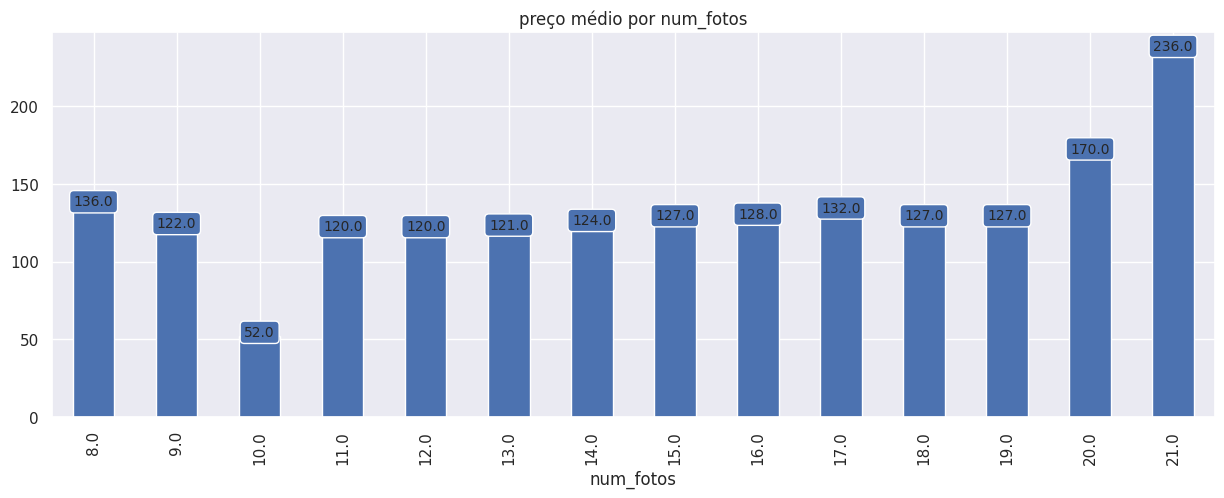

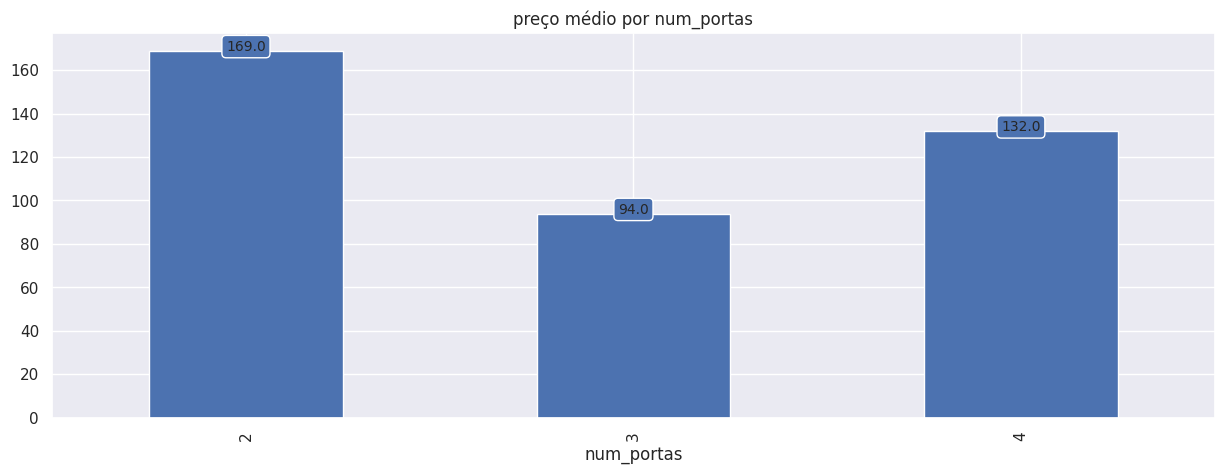

In [62]:
#Feature Numéricas Discretas
features = COLUNAS_NUM_CONT["discretas"]

for feature in features:
    plotData = dfTreino.groupby(feature)["preco"].mean() / 1000
    ax = plotData.plot(kind= "bar",figsize= (15,5))
    
    labels = plotData.values
    for i, label in enumerate(labels):
        label = round(label, 0)
        plt.text(x= i, y= label, s= label,
                 fontsize= 10,
                 ha= "center",
                 bbox= dict(boxstyle= "round"))
    
    plt.title(f"preço médio por {feature}")
    plt.show()    

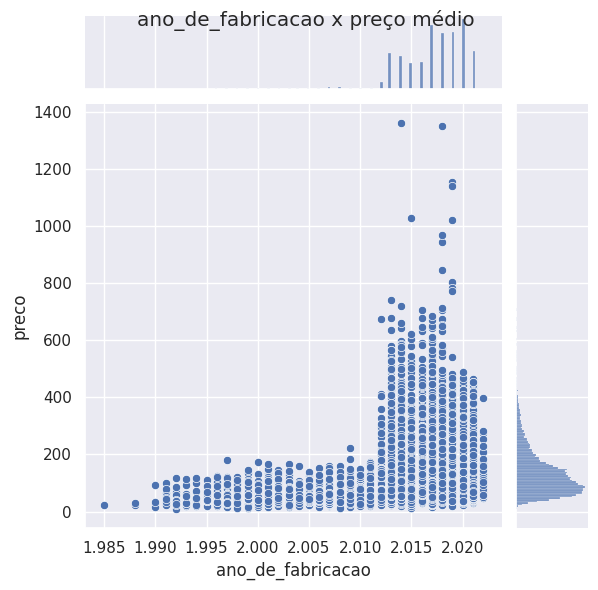

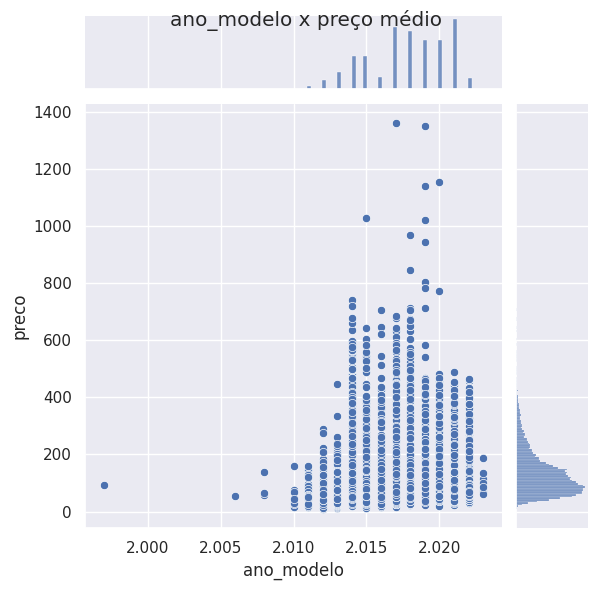

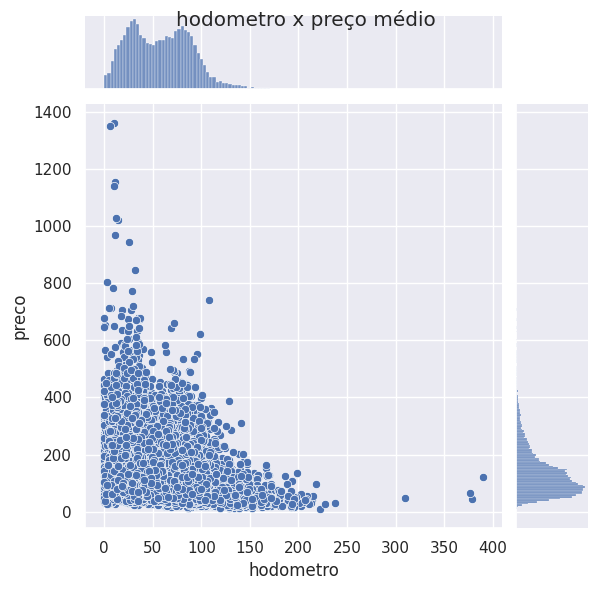

In [63]:
#Features Numéricas Continuas:
features = COLUNAS_NUM_CONT["continuas"]

for feature in features:
    sns.set(rc={'figure.figsize':(5,5)})
    sns.jointplot(data= dfTreino / 1000, x= feature, y= "preco")
    plt.suptitle(feature + " x preço médio")

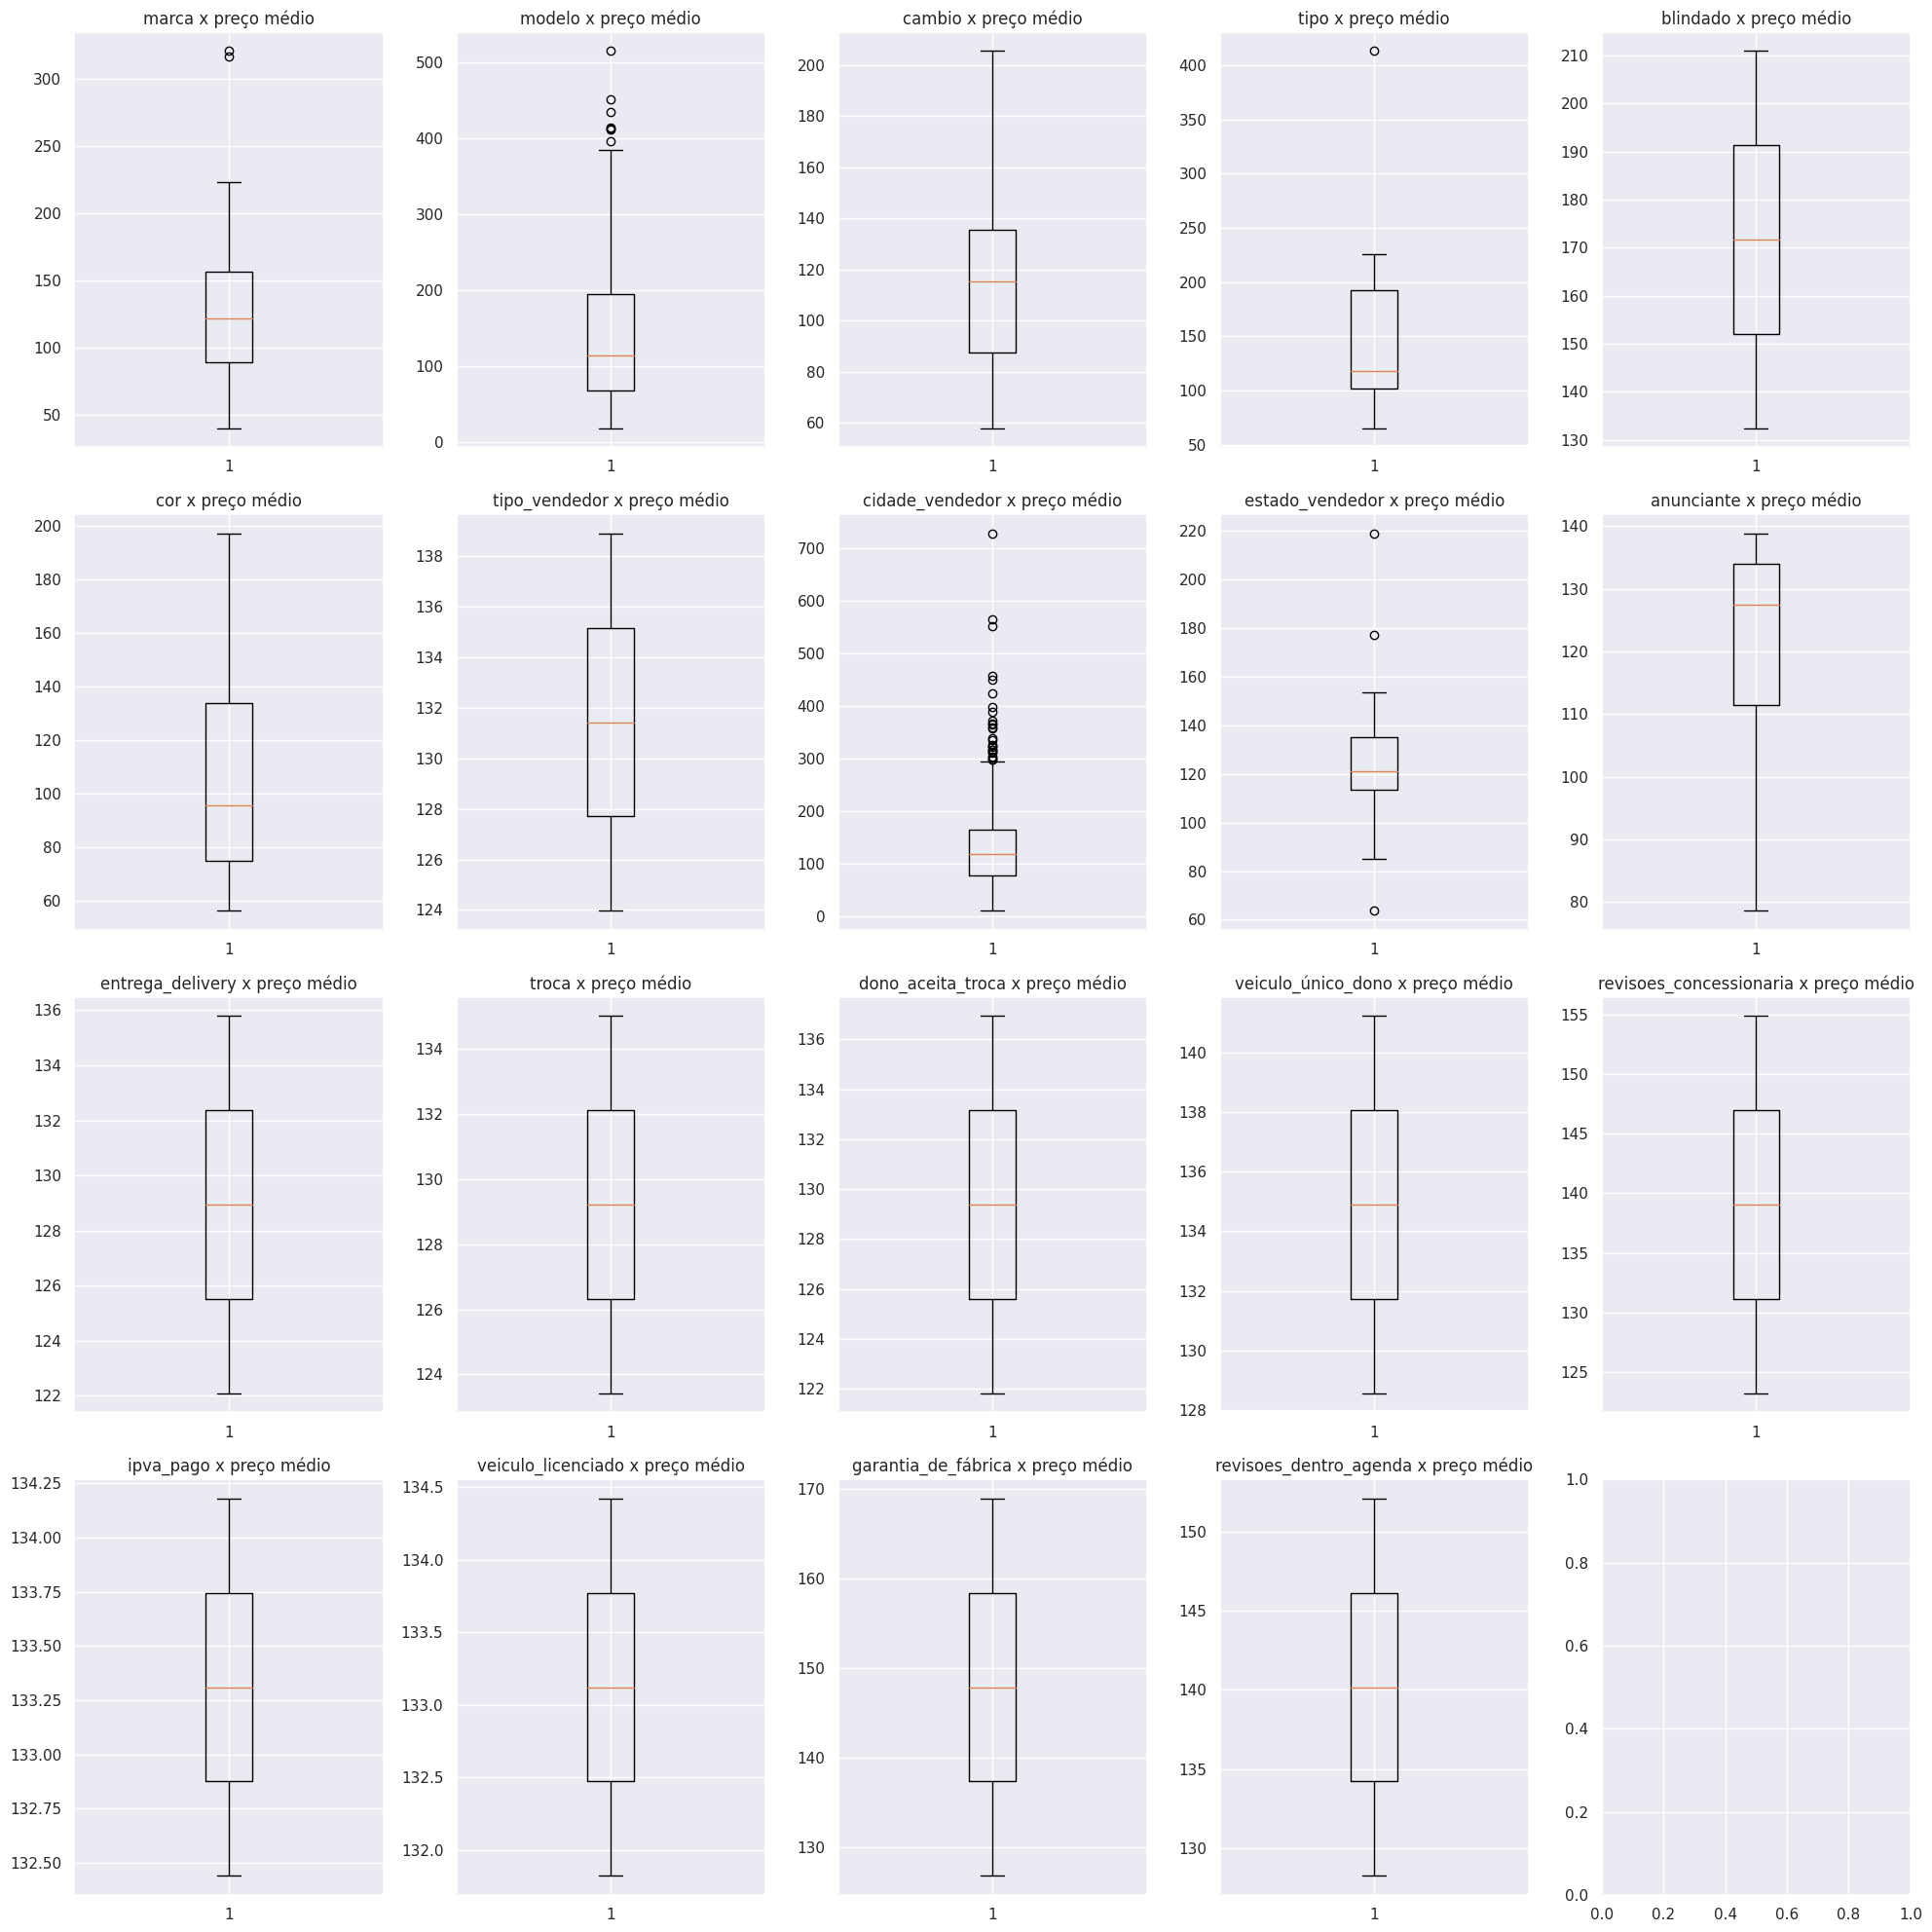

In [64]:
#Features Categóricas:
fig, axes = plt.subplots(nrows= 4, ncols= 5, figsize= (20,20))


for feature, ax in zip(COLUNAS_CAT,axes.flat):
    plotData = dfTreino.groupby(feature)["preco"].mean() / 1000
    ax.boxplot(plotData)
    ax.set_title(feature + " x preço médio")
    plt.tight_layout()


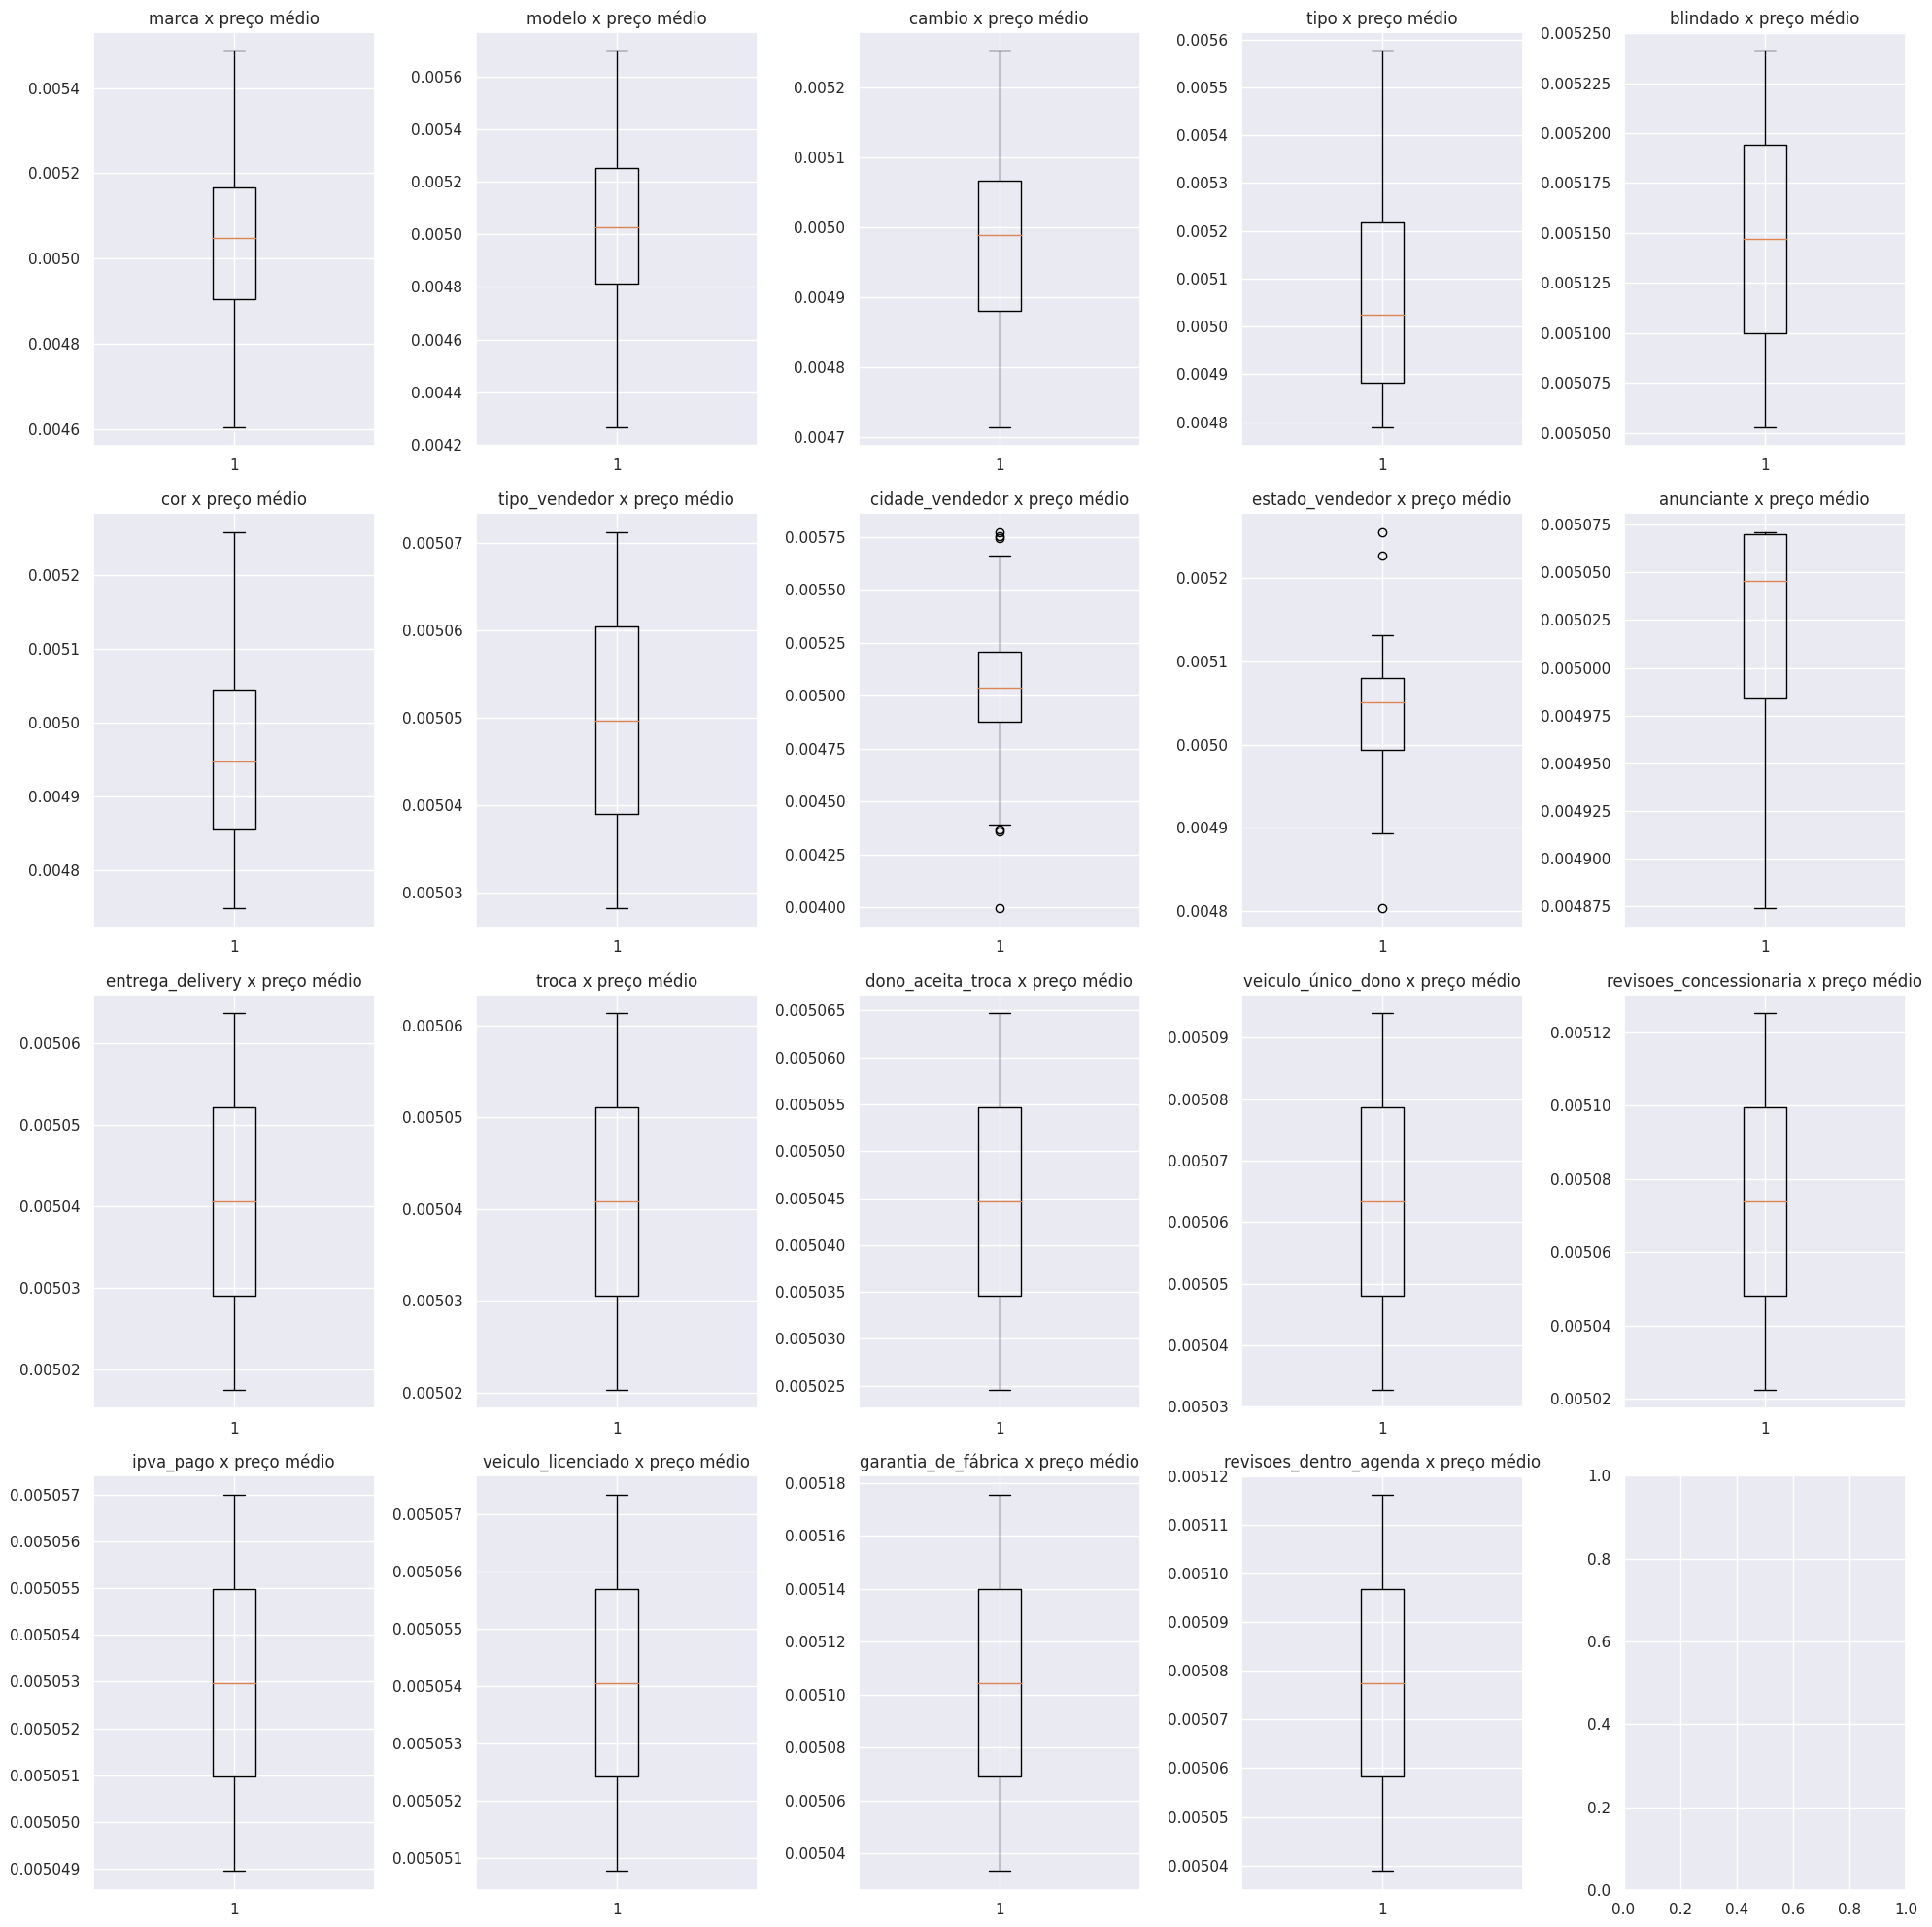

In [65]:
#Features Categóricas (utilizando preco_log):
fig, axes = plt.subplots(nrows= 4, ncols= 5, figsize= (20,20))


for feature, ax in zip(COLUNAS_CAT,axes.flat):
    plotData = dfTreino.groupby(feature)["preco_log"].mean() / 1000
    ax.boxplot(plotData)
    ax.set_title(feature + " x preço médio")
    plt.tight_layout()

Importação do Arquivo de Codigos

In [66]:
dfCodigos = codigos()
dfCodigos

marca                      {'NISSAN': 0, 'JEEP': 1, 'KIA': 2, 'VOLKSWAGEN...
modelo                     {'KICKS': 0, 'COMPASS': 1, 'SORENTO': 2, 'AMAR...
cambio                     {'CVT': 0, 'Automática': 1, 'Manual': 2, 'Auto...
tipo                       {'Sedã': 0, 'Picape': 1, 'Utilitário esportivo...
blindado                                                    {'N': 0, 'S': 1}
cor                        {'Branco': 0, 'Preto': 1, 'Prata': 2, 'Cinza':...
tipo_vendedor                                             {'PF': 0, 'PJ': 1}
cidade_vendedor            {'Rio de Janeiro': 0, 'Belo Horizonte': 1, 'Sa...
estado_vendedor            {'São Paulo (SP)': 0, 'Minas Gerais (MG)': 1, ...
anunciante                 {'Pessoa Física': 0, 'Loja': 1, 'Concessionári...
entrega_delivery                                     {'False': 0, 'True': 1}
troca                                                {'False': 0, 'True': 1}
dono_aceita_troca                                {'0': 0, 'Aceita troca': 1}

Questões de Negócio

In [67]:
#a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
criterio = (dfTreino["preco"] < dfTreino["preco"].quantile(0.25))
df = dfTreino[criterio]

cod_estado = df.groupby("estado_vendedor")['estado_vendedor'].mean().idxmax()

dictCod = dfCodigos["estado_vendedor"]
dictCod = {cod: descricao for descricao, cod in dictCod.items()}
print(dictCod[cod_estado])

Espírito Santo (ES)


In [68]:
#b. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
cod_tipo = dfCodigos["tipo"]['Picape']
cod_cambio = dfCodigos["cambio"]['Automática']

criterio = (dfTreino["tipo"] == cod_tipo) & (dfTreino["cambio"] == cod_cambio)
df = df[criterio]

cod_estado = df.groupby("estado_vendedor")['preco'].mean().idxmin()
    
dictCod = dfCodigos["estado_vendedor"]
dictCod = {cod: descricao for descricao, cod in dictCod.items()}
print(dictCod[cod_estado])

Mato Grosso do Sul (MS)


/home/usuario/GitHub/IndiciumLH/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [69]:
#c. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?
criterio = (dfTreino["garantia_de_fábrica"] == 1)
df = df[criterio]

cod_estado = df.groupby("estado_vendedor")['preco'].mean().idxmin()
    
dictCod = dfCodigos["estado_vendedor"]
dictCod = {cod: descricao for descricao, cod in dictCod.items()}
print(dictCod[cod_estado])

Paraná (PR)


/home/usuario/GitHub/IndiciumLH/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
